In [1]:
import numpy as np
import matplotlib.pyplot as plt

Plot some examples of the latent 2D space.

In [2]:
def plot_latent_space(x, dim1=21, dim2=21, figsize=(10,10), ylabel=None, title=None):
    b = x.reshape(-1, 28, 28)
    canvas = np.empty((28 * dim1, 28 * dim2))

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for j in range(dim1):
        for i in range(dim2):
            canvas[j * 28:(j + 1) * 28, i * 28:(i + 1) * 28] = b[i + 21 * j]

    plt.imshow(canvas)
    plt.ylabel(ylabel)
    ax.set_xticks([])
    if ylabel is None:
        ax.set_yticks([])
    else:
        ax.set_yticks([14 + 28 * i for i in range(dim1)])
        ax.set_yticklabels(list(range(1,dim1+1)))
    plt.title(title)
    plt.show()
    
def plot_distribution(dta, coords=(1,2)):
    plt.figure(figsize=(10,10))

    for label in range(10):
        indices = np.where(dta[:,0] == float(label))
        plt.scatter(dta[indices, coords[0]], dta[indices, coords[1]], label=label)
    plt.legend()
    plt.show()

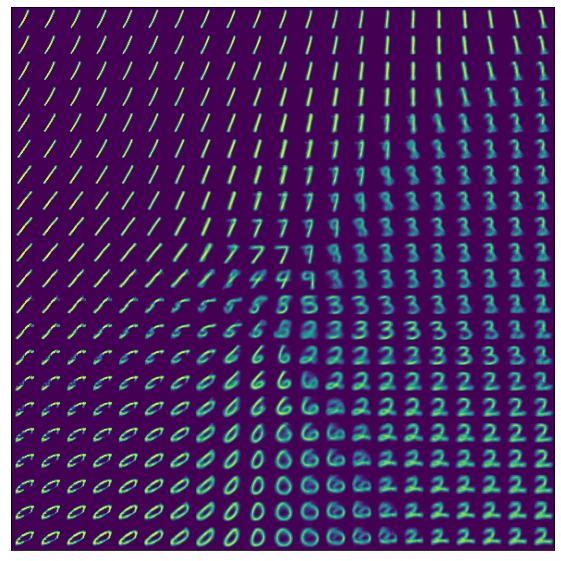

In [3]:
plot_latent_space(np.loadtxt("latent_space_beta_0.txt"))

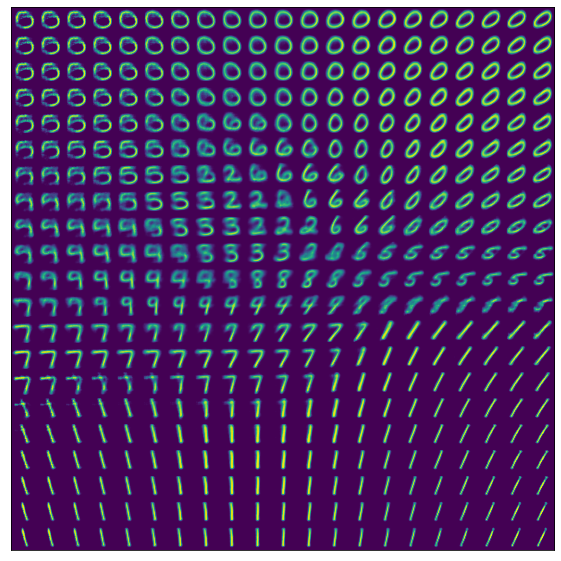

In [4]:
plot_latent_space(np.loadtxt("latent_space_beta_1.txt"))

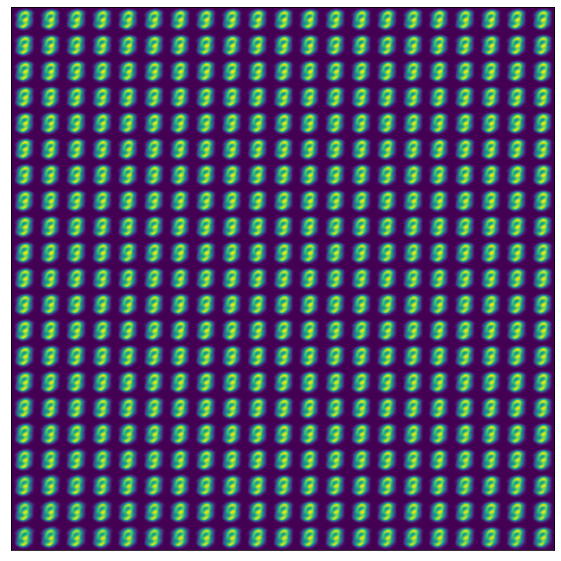

In [5]:
plot_latent_space(np.loadtxt("latent_space_beta_4.txt"))

The last latent space does not look good. To better understand why, let's take a look at distributions.

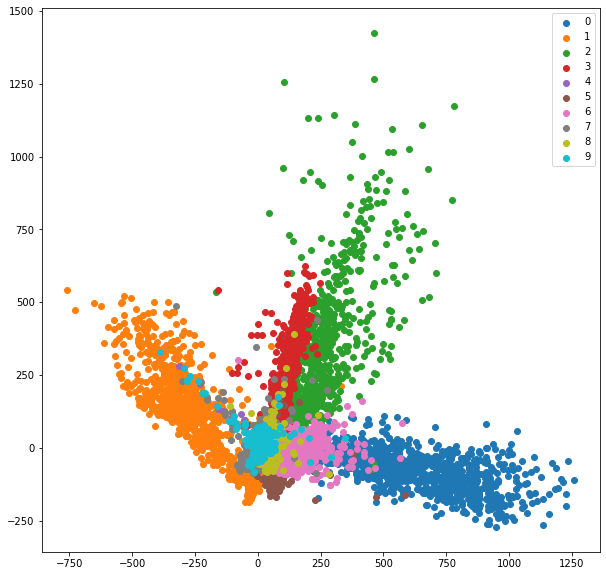

In [6]:
plot_distribution(np.loadtxt("VAE-CNN-beta_0.log"))

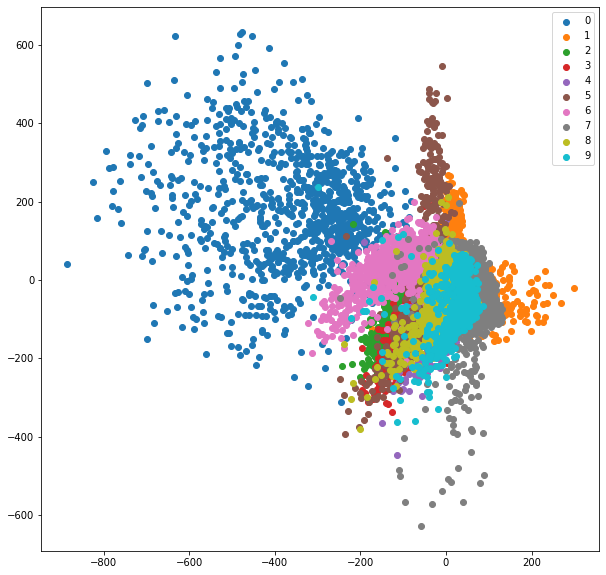

In [7]:
plot_distribution(np.loadtxt("VAE-CNN-beta_1.log"))

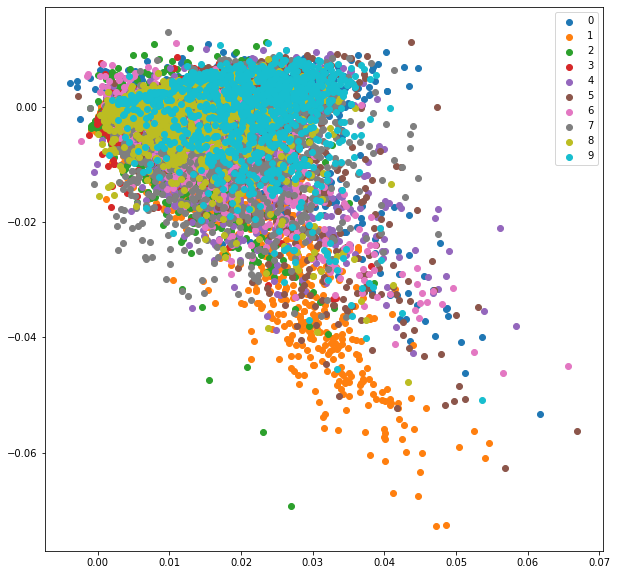

In [8]:
plot_distribution(np.loadtxt("VAE-CNN-beta_4.log"))

Now, we see that the distributions overlap. This explains the picture we have seen before.
We can tell that $\beta=4$ was too large parameter value for the given architecture.
After all, $\beta$ is a hyperparameter and it is meant to be optimized individually for each configuration.

I. Higgins and co-authors suggest that larger $L$ (size of latent space $z$) require larger $\beta$ values. Therefore, let's try to fix our problem by increasing $L=10$.

Here is how we can visualize the latent space: Scanning along every of 10 coordinates individually.

<pre>
main = do
    beta_: _ <- getArgs
    putStrLn $ "beta = " ++ beta_

    let cpt = printf "VAE-CNN-Aug2022-beta_%s_z10.ht" beta_

    -- Restoring the model from a checkpoint
    net <- load' cpt

    let xs = [-3.0,-2.7..3.0::Float]
        is = [0..latent_size-1]

        -- Scan the latent space in each single dimension
        zs = [ (replicate i 0) ++ [x] ++ (replicate (latent_size - i - 1) 0) | i<-is, x <-xs ]

        decoded = Torch.cat (Dim 0) $
                    map (decode net. toLocalModel'. asTensor. (:[])) zs

    writeFile (printf "latent_space_beta_%s_z10.txt" beta_) (toStr decoded)

    putStrLn "Done"

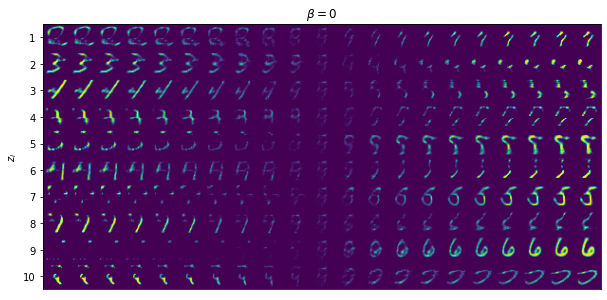

In [9]:
plot_latent_space(np.loadtxt("latent_space_beta_0_z10.txt"),
                  dim1=10, dim2=21, ylabel=r'$z_i$', title=r"$\beta=0$")

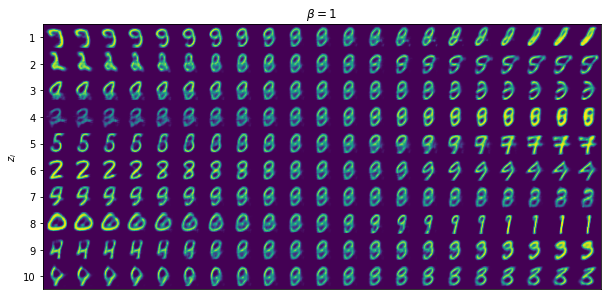

In [10]:
plot_latent_space(np.loadtxt("latent_space_beta_1_z10.txt"),
                  dim1=10, dim2=21, ylabel=r'$z_i$', title=r"$\beta=1$")

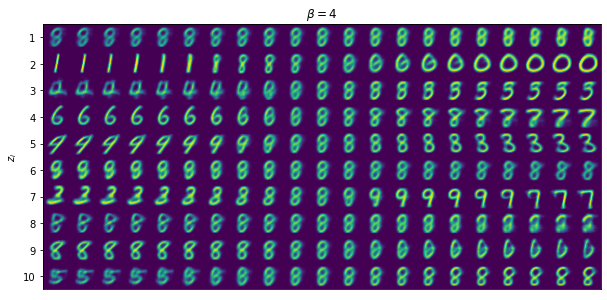

In [11]:
plot_latent_space(np.loadtxt("latent_space_beta_4_z10.txt"),
                  dim1=10, dim2=21, ylabel=r'$z_i$', title=r"$\beta=4$")

Indeed, the latent space for $\beta=4$ looks more disentangled compared to the
one for $\beta=1$. We can see e.g. that $z_1$ is the parameter that defines
how "light" or how "bold" is the digit, whereas $z_2$ controls how wide is
the digit. Whereas such individual components for $\beta=1$ are hard to identify.
For instance $z_4$ ($\beta=1$) controls not only how "bold" is the digit, but
also its shape.

Let's visualize the distributions.
Note that we plot a projection, i.e. we plot only two latent coordinates out of 10.

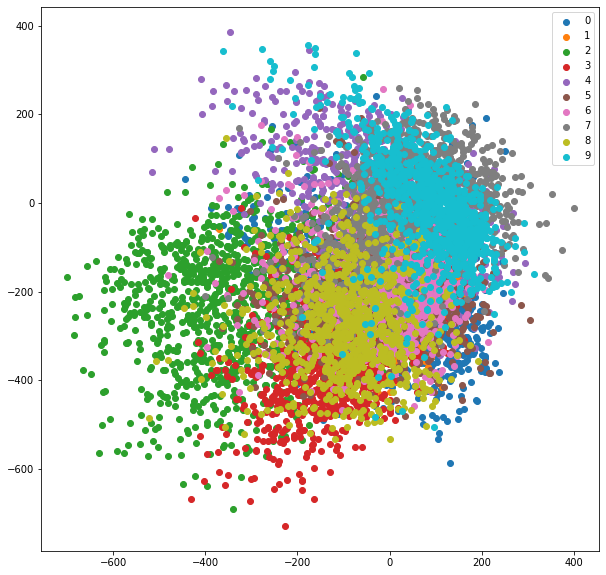

In [12]:
plot_distribution(np.loadtxt("VAE-CNN-beta_0_z10.log"))

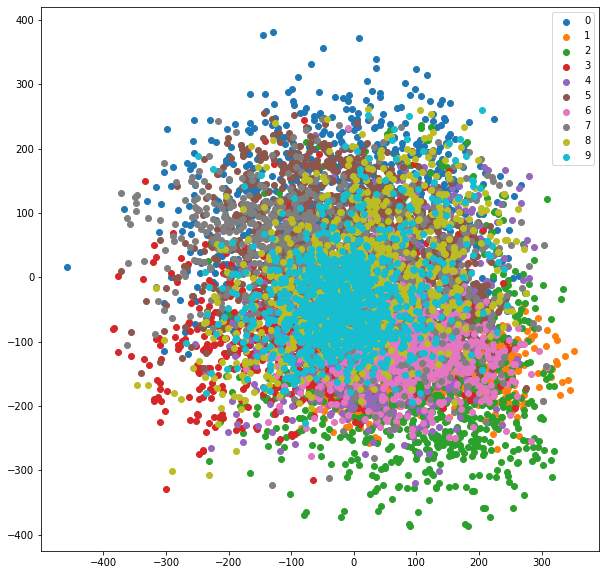

In [13]:
plot_distribution(np.loadtxt("VAE-CNN-beta_1_z10.log"))

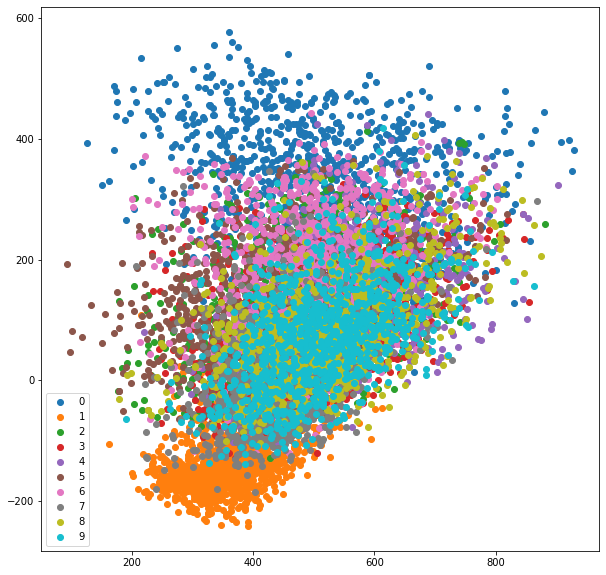

In [14]:
plot_distribution(np.loadtxt("VAE-CNN-beta_4_z10.log"))